In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

!ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
gdrive	sample_data


In [ ]:
import os

home_dir = '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction'
os.chdir(home_dir)
!pwd

!pip install seaborn 
!pip install geopandas

from glob import glob
import csv

import pandas as pd
import geopandas as gpd

import numpy as np

import torch

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
import matplotlib.font_manager

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False

/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dir = os.path.join(home_dir, 'data/models/rnn/', '*.csv')

files = glob(dir)

print(files)

df = pd.DataFrame()

for ifile in files:
  df = pd.concat([df, pd.read_csv(ifile)])

df

['/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2008.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2010.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2012.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2014.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2015.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2017.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2016.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2004.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2006.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2005.csv', '/content/gdrive/My Drive/AYield/China/pycrop-yield-prediction/data/models/rnn/2009.csv', '/content

,year,run_number,time_idx,RMSE,ME,MAPE,RMSE_GP,ME_GP,MAPE_GP
0,2008,1,32,0.141623,-0.043508,-0.271765,0.125734,-0.028336,-0.226398
1,2008,2,32,0.135494,-0.031172,-0.244145,0.123262,-0.029262,-0.223115
2,2008,3,32,0.136738,-0.037469,-0.251829,0.122892,-0.028252,-0.217012
3,2008,4,32,0.143044,-0.040193,-0.268275,0.133594,-0.032392,-0.243308
4,2008,5,32,0.134257,-0.034823,-0.246551,0.127818,-0.033078,-0.233535
...,...,...,...,...,...,...,...,...,...
5,2007,6,32,0.064257,-0.013154,-0.032485,0.058596,0.001047,-0.005063
6,2007,7,32,0.076473,-0.012087,-0.031665,0.073085,-0.002621,-0.011596
7,2007,8,32,0.082216,-0.029664,-0.060161,0.071664,-0.013301,-0.031329
8,2007,9,32,0.073428,-0.013089,-0.035439,0.063348,-0.006164,-0.018099


In [ ]:
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
run_nums = 10

df = pd.DataFrame()

for year in years:
  for run_num in range(1, run_nums + 1, 1):
    files = glob(os.path.join(home_dir, 'data/models/rnn/', f'{year}_{run_num}_*.tar'))
    model_information = torch.load(files[0], map_location=torch.device('cpu'))

    state = []
    countys = []
    for ii in range(0,len(model_information['test_indices']), 1):
      state.append( model_information['test_indices'][ii][0] )
      countys.append( model_information['test_indices'][ii][1] )
    df = pd.concat( [df, pd.DataFrame({'run_num':run_num, 'test_real':model_information['test_real'], 'test_pred_gp':model_information['test_pred_gp'], 'county':countys,'test_years':model_information['test_years']})] )

df

,run_num,test_real,test_pred_gp,county,test_years
0,1,1.231707,0.588260,0,2004
1,1,0.810080,0.624199,1,2004
2,1,0.565904,0.690416,2,2004
3,1,0.405303,0.568656,3,2004
4,1,0.737780,0.730560,5,2004
...,...,...,...,...,...
15,10,0.741747,0.867937,21,2018
16,10,0.626291,0.635567,23,2018
17,10,0.629613,0.640985,24,2018
18,10,0.765632,0.652357,26,2018


In [ ]:
df = df[ df['county'] != 20]
df

dir = os.path.join(home_dir, 'data/china_yield', 'wheat_2002-2018.csv')
shps = pd.read_csv(dir)

shps

from shapely import wkt

shps['geometry'] = shps['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(shps, crs='epsg:4326')
gdf

# gdff = gdf[ gdf['County'].unique() ]

# gdff
# gdf.plot(edgecolor='k')
# gdf[0].plot()

,Unnamed: 0,Value,State,County,Year,OBJECTID,BIANMA,Region_Chinese,ENAME,Shape_Leng,Shape_Area,Region,geometry,SownArea,YieldVal
0,0,NaN,1,0,2002,1,110000.0,北京市,Beijing Shi,8.698727,1.735276,Beijing_City,"POLYGON ((116.45969 40.92497, 116.45547 40.931...",4.50,NaN
1,1,1.801242,1,0,2003,1,110000.0,北京市,Beijing Shi,8.698727,1.735276,Beijing_City,"POLYGON ((116.45969 40.92497, 116.45547 40.931...",1.61,2.90
2,2,1.231707,1,0,2004,1,110000.0,北京市,Beijing Shi,8.698727,1.735276,Beijing_City,"POLYGON ((116.45969 40.92497, 116.45547 40.931...",0.82,1.01
3,3,0.625000,1,0,2005,1,110000.0,北京市,Beijing Shi,8.698727,1.735276,Beijing_City,"POLYGON ((116.45969 40.92497, 116.45547 40.931...",0.80,0.50
4,4,0.666667,1,0,2006,1,110000.0,北京市,Beijing Shi,8.698727,1.735276,Beijing_City,"POLYGON ((116.45969 40.92497, 116.45547 40.931...",0.69,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,522,0.892468,1,30,2014,31,650000.0,新疆维吾尔自治区,Xinjiangweiwu'er Zizhiqu,85.187518,175.581724,Xin_Jiang,"POLYGON ((87.02872 49.13589, 87.03313 49.13147...",82.58,73.70
523,523,0.900321,1,30,2015,31,650000.0,新疆维吾尔自治区,Xinjiangweiwu'er Zizhiqu,85.187518,175.581724,Xin_Jiang,"POLYGON ((87.02872 49.13589, 87.03313 49.13147...",74.84,67.38
524,524,0.862679,1,30,2016,31,650000.0,新疆维吾尔自治区,Xinjiangweiwu'er Zizhiqu,85.187518,175.581724,Xin_Jiang,"POLYGON ((87.02872 49.13589, 87.03313 49.13147...",83.09,71.68
525,525,0.881870,1,30,2017,31,650000.0,新疆维吾尔自治区,Xinjiangweiwu'er Zizhiqu,85.187518,175.581724,Xin_Jiang,"POLYGON ((87.02872 49.13589, 87.03313 49.13147...",74.24,65.47


20 [ 0  1  2  3  5  8  9 11 12 13 14 15 16 17 19 21 23 24 26 29]


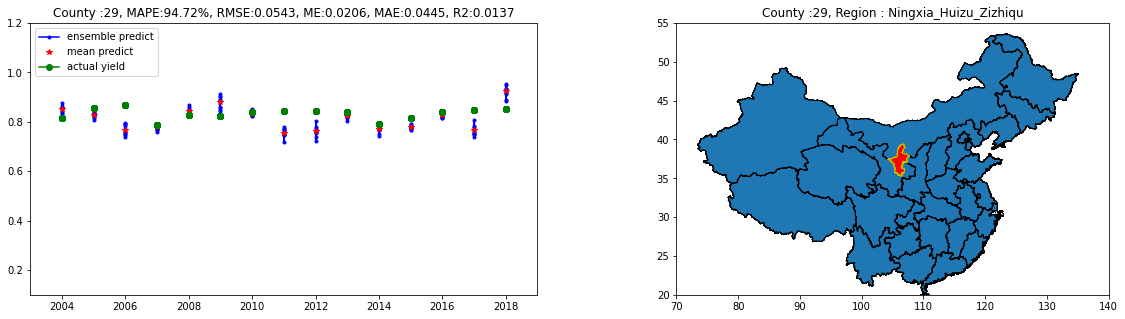

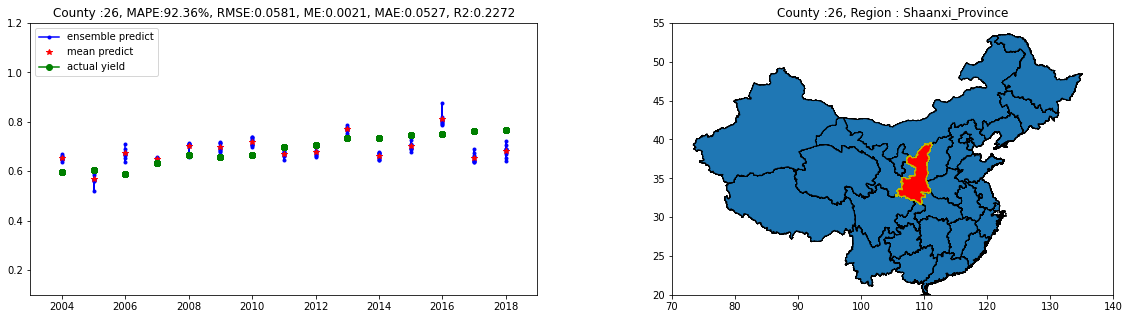

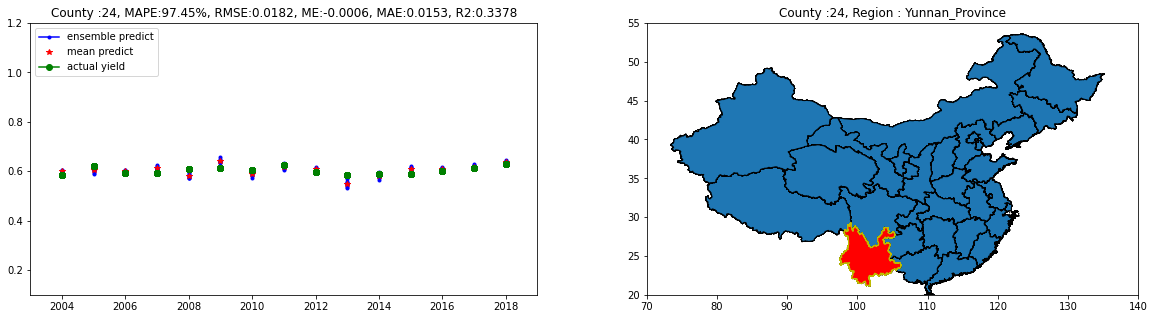

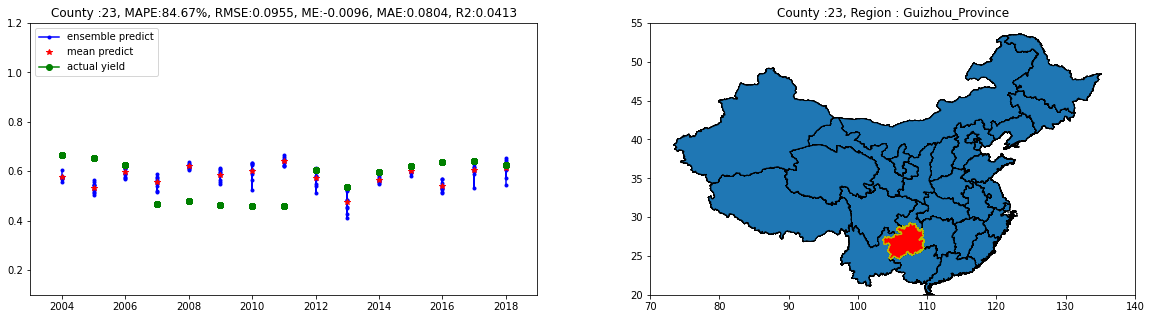

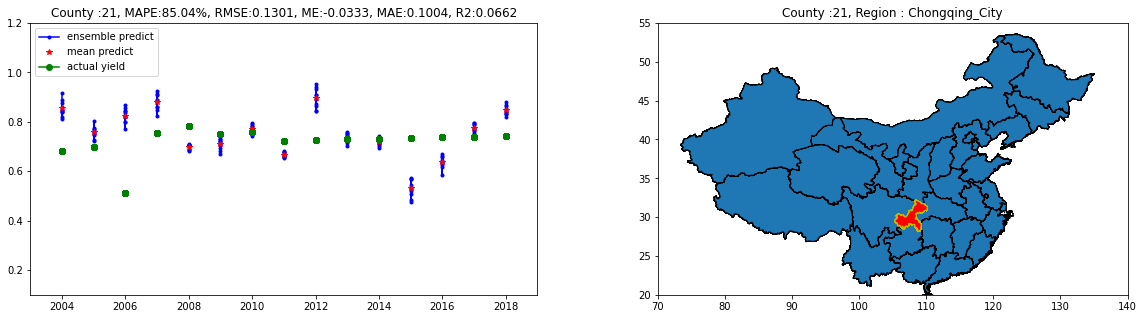

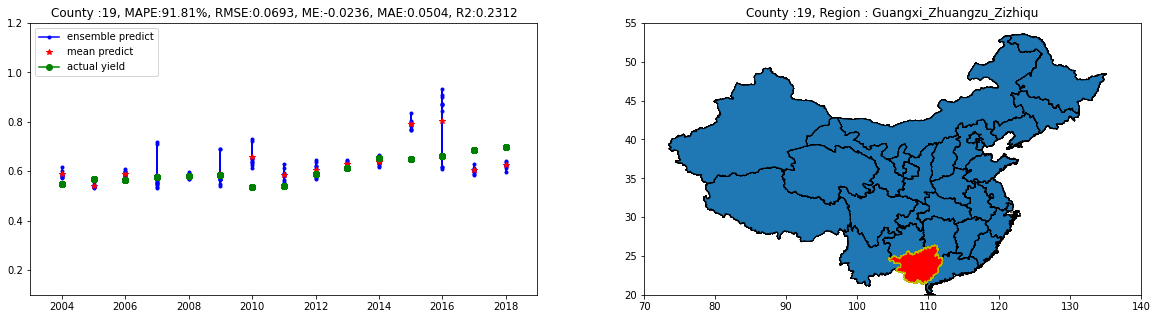

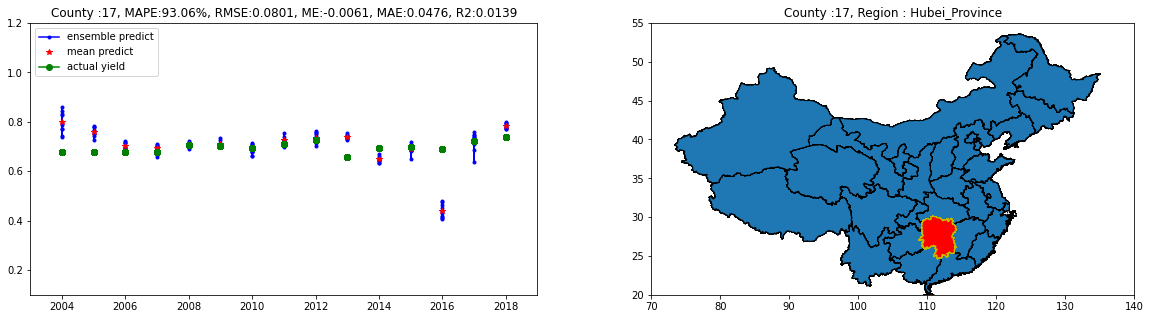

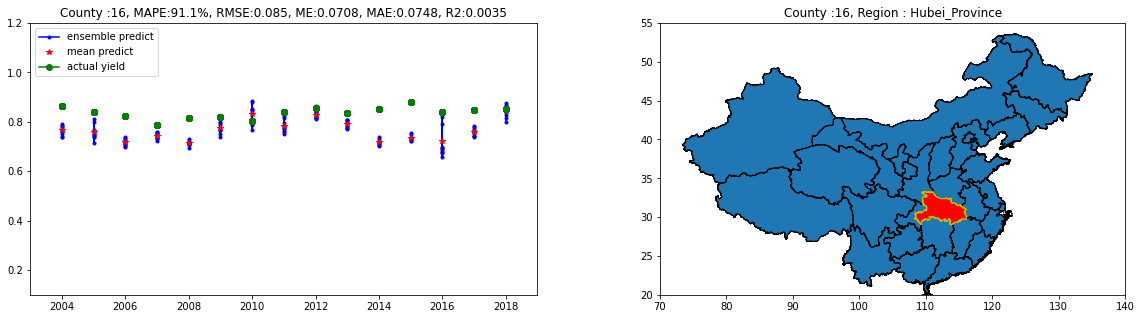

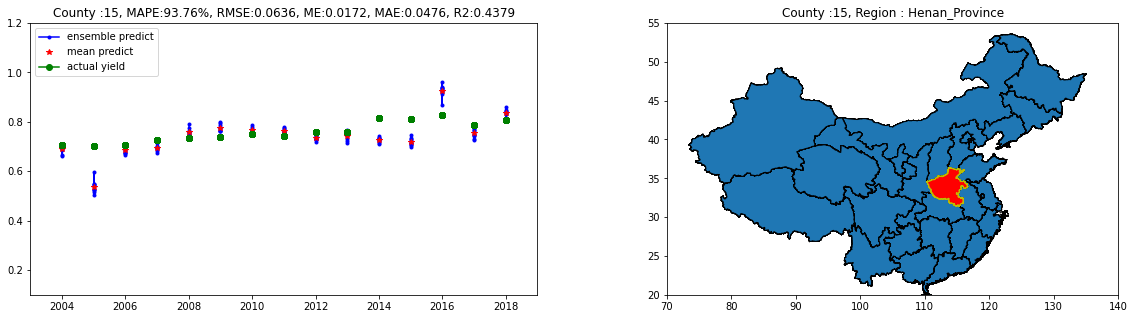

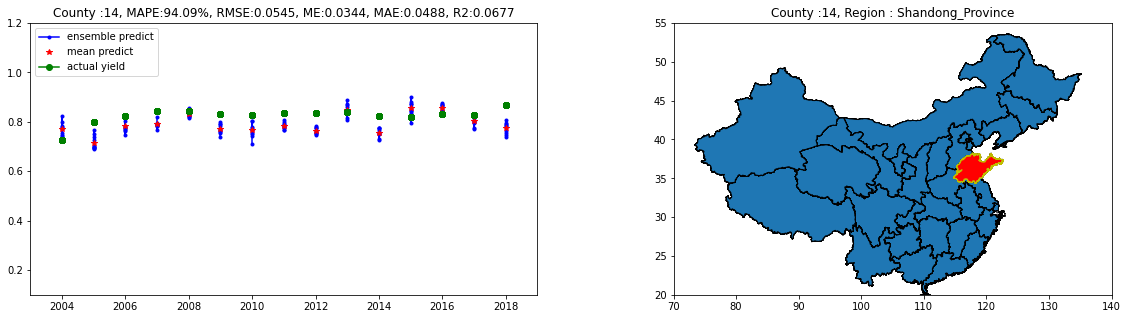

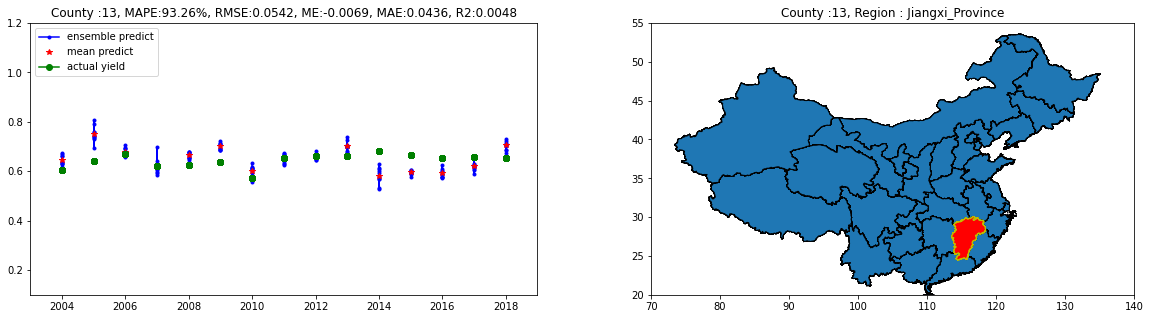

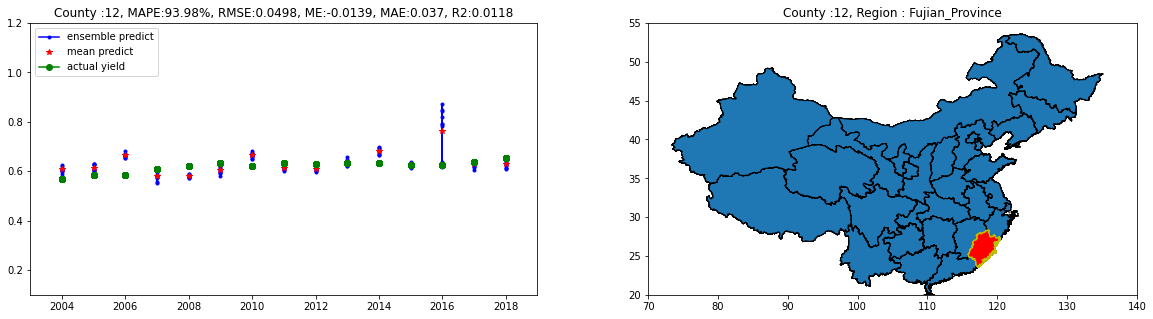

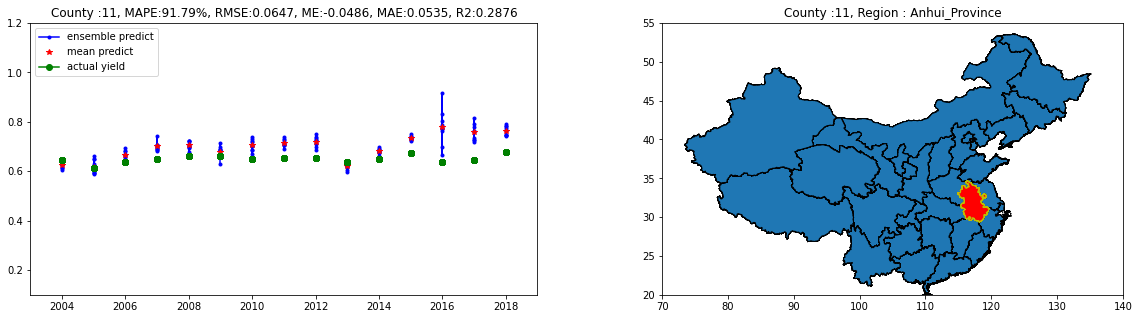

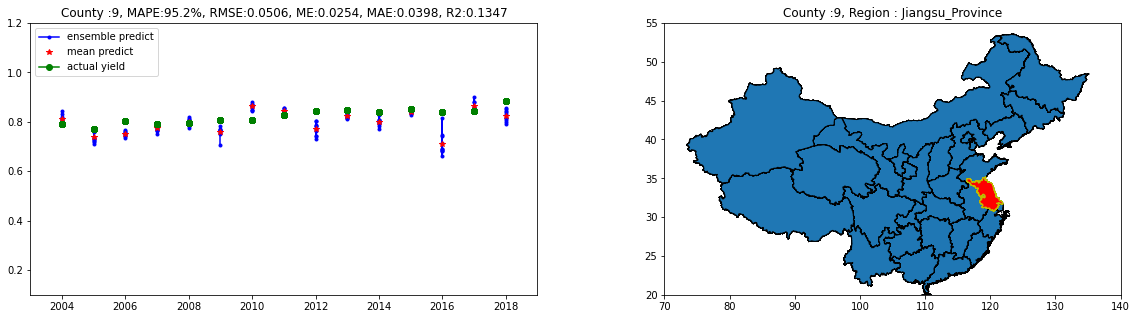

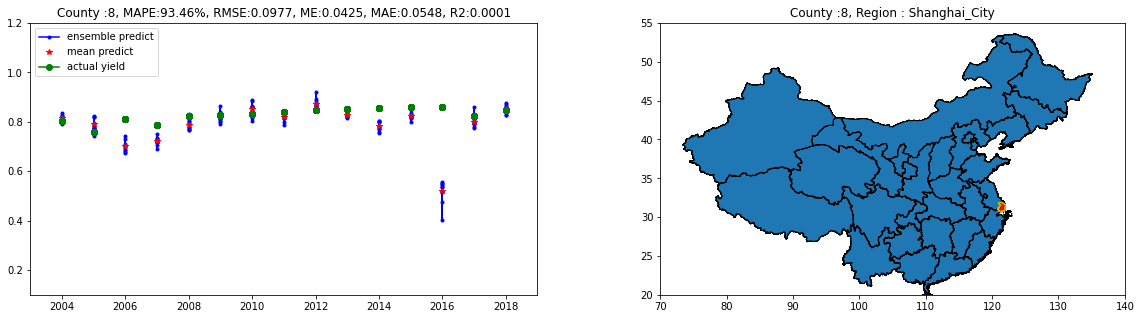

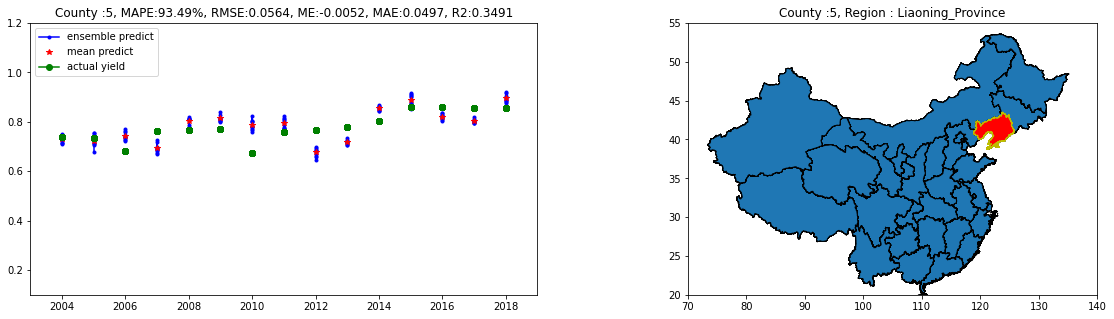

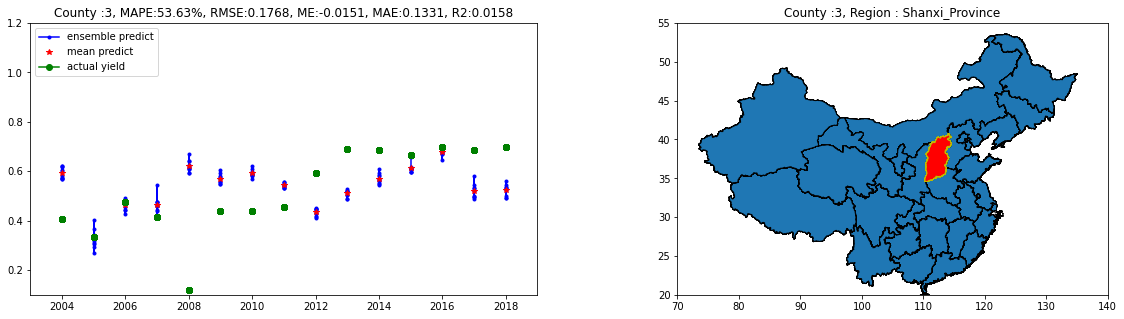

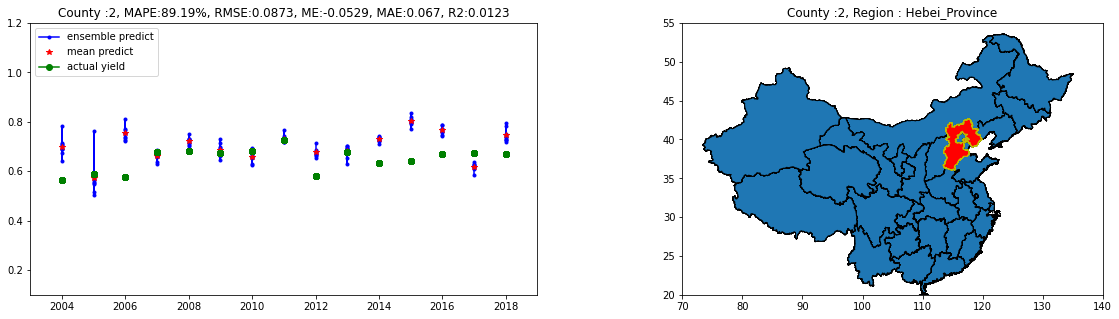

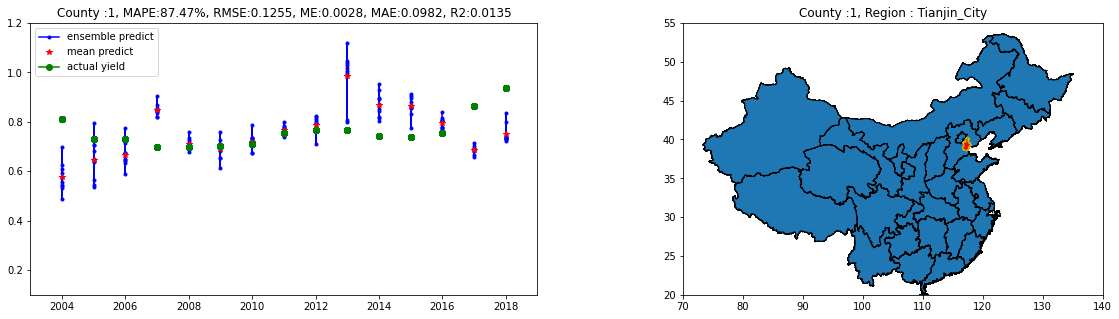

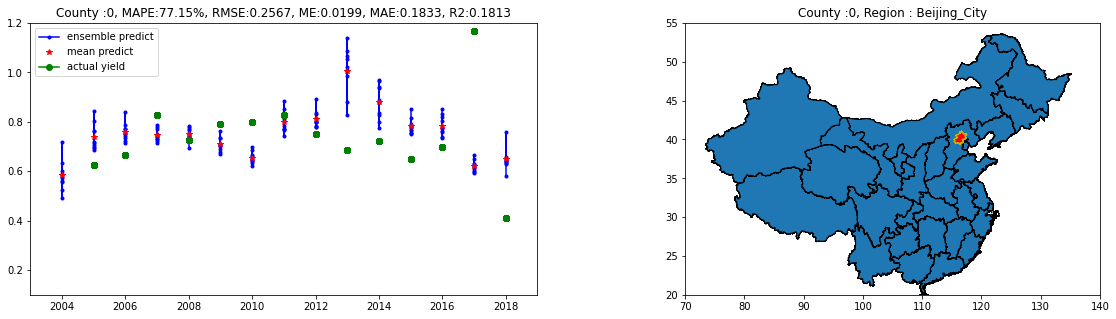

In [ ]:
from pyparsing.helpers import PrecededBy
def analyze_results(true, pred, pred_gp):
    """Calculate ME and RMSE"""
    rmse = np.sqrt(np.mean((true - pred) ** 2)).round(4)
    me = np.mean(true - pred).round(4)
    mae = np.mean(np.abs(true - pred)).round(4)
    mape = 100 - np.mean( np.abs(true-pred) / true ).round(4) * 100
    # r2 = r2_score(true, pred)
    reg = LinearRegression().fit(true.reshape(-1, 1), pred.reshape(-1, 1))
    r2 = reg.score(true.reshape(-1, 1), pred.reshape(-1, 1))

    # print(f"Without GP: RMSE: {rmse}, ME: {me}, MAE:{mae} MAPE: {mape}")

    if pred_gp is not None:
        rmse_gp = np.sqrt(np.mean((true - pred_gp) ** 2))
        me_gp = np.mean(true - pred_gp)
        mape_gp = np.mean( np.abs(true-pred_gp) / true ) 
        print(f"With GP: RMSE: {rmse_gp}, ME: {me_gp}, MAPE:{mape_gp}")
        return rmse, me, mape, rmse_gp, me_gp, mape_gp
    return rmse, me, mae, mape, r2 

print(len(df['county'].unique()), df['county'].unique())
# fn

for county in np.sort(df['county'].unique())[::-1]:
  dff = df[ df['county'] == county]

  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
  ax1.set_ylim([0.1, 1.2])
  ax1.set_xlim([2003, 2019])
  ax2.set_ylim([20, 55])
  ax2.set_xlim([70, 140])
  mean_yield = []
  act_yield = []
  rdff = []
  for year in years:
    rdff = dff[ dff['test_years'] == year ]
    act_yield.append( np.mean(rdff['test_real']) )
    mean_yield.append( np.mean(rdff['test_pred_gp']) )
    ax1.plot(rdff['test_years'], rdff['test_pred_gp'], '.-', color='b', label='ensemble')
    ax1.plot(year, np.mean(rdff['test_pred_gp']), '*', color='r', label='mean')
    ax1.plot(rdff['test_years'], rdff['test_real'], 'o-', color='g', label='actual')
  gdf.plot(ax=ax2, edgecolor='k')
  gdff = gdf[ gdf['County'] == county]
  gdff.plot(ax=ax2, color='r', edgecolor='y')

  results = analyze_results(np.array(act_yield), np.array(mean_yield), None)
  ax1.set_title(f'County :{county}, MAPE:{results[3].round(4)}%, RMSE:{results[0]}, ME:{results[1]}, MAE:{results[2]}, R2:{results[4].round(4)}')
  # print(gdff['Region'].unique()[0], gdff['Region_Chinese'].unique()[0])
  region = gdff['Region'].unique()[0]
  # region_chinese = gdff['Region_Chinese'].unique()[0]
  ax2.set_title(f'County :{county}, Region : {region}')
  files = os.path.join(home_dir, 'data/models/rnn/', f'{region}.png')
  # plt.savefig(files, bbox_inches='tight')
  ax1.legend(['ensemble predict', 'mean predict', 'actual yield'], loc='upper left')
  plt.savefig(files, bbox_inches='tight')
  plt.show()


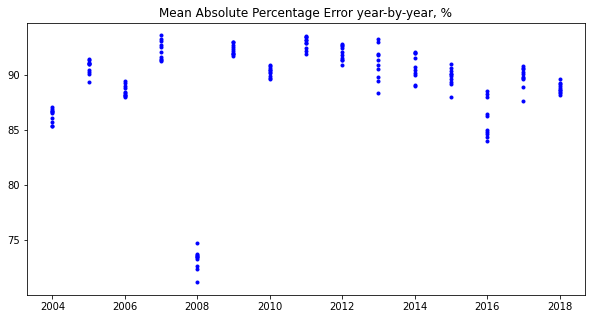

In [ ]:
fig = plt.figure(figsize=(10,5))

mape_df = pd.DataFrame()

for year in years:
  for run_num in range(1, run_nums + 1, 1):
    dff = df[ df['test_years'] == year ]
    rdff = dff[ dff['run_num'] == run_num ]
    results = analyze_results(np.array(rdff['test_real']), np.array(rdff['test_pred_gp']), None)
    # print(year, run_num, results)
    plt.plot(year, (results[3]), '.', color='b')
    mape_df = pd.concat([mape_df, pd.DataFrame({ 'year':[year], 'mape':[results[3]] })])

plt.title('Mean Absolute Percentage Error year-by-year, %')
files = os.path.join(home_dir, 'data/models/rnn/', f'year-by-year.png')
plt.savefig(files, bbox_inches='tight')
plt.show()

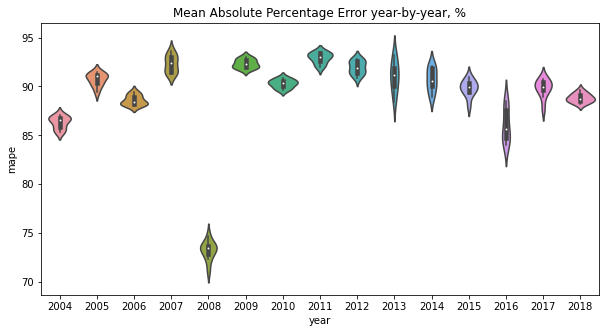

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=mape_df, x='year', y='mape').set(title='Mean Absolute Percentage Error year-by-year, %')
files = os.path.join(home_dir, 'data/models/rnn/', f'year-by-year_violin.png')
plt.savefig(files, bbox_inches='tight')
plt.show()

In [ ]:
%

UsageError: Line magic function `%` not found.
